In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cashless_society.csv to cashless_society (1).csv


In [42]:
import pandas as pd
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
print(df.info())
print(df.head())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               185 non-null    object
 1   Gender            185 non-null    object
 2   Occupation        185 non-null    object
 3   Income            185 non-null    object
 4   Shopping_freq     185 non-null    object
 5   Paybills_freq     185 non-null    object
 6   Payrent_freq      185 non-null    object
 7   Motivation        185 non-null    object
 8   Knowing_features  185 non-null    object
 9   Impact            185 non-null    object
dtypes: object(10)
memory usage: 14.6+ KB
None
     Age Gender Occupation            Income  Shopping_freq  \
0  21-25   Male    Student  Below 10,000 BDT  Mobile Wallet   
1  21-25   Male    Student  Below 10,000 BDT  Mobile Wallet   
2  21-25   Male    Student  Below 10,000 BDT  Mobile Wallet   
3  21-25   Male    Student  Below 10,000 BDT

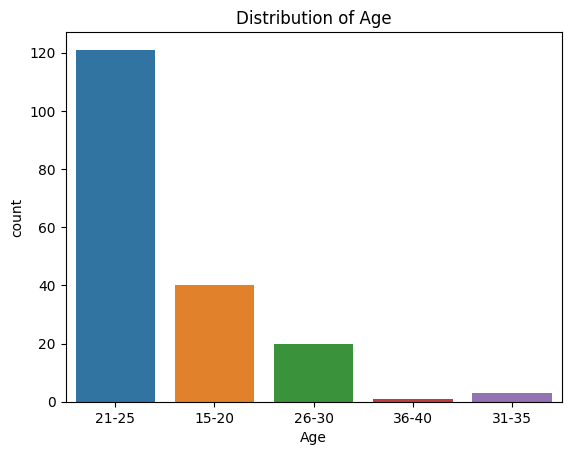

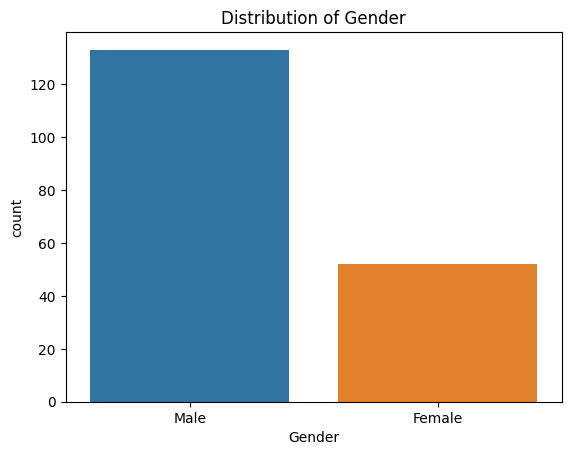

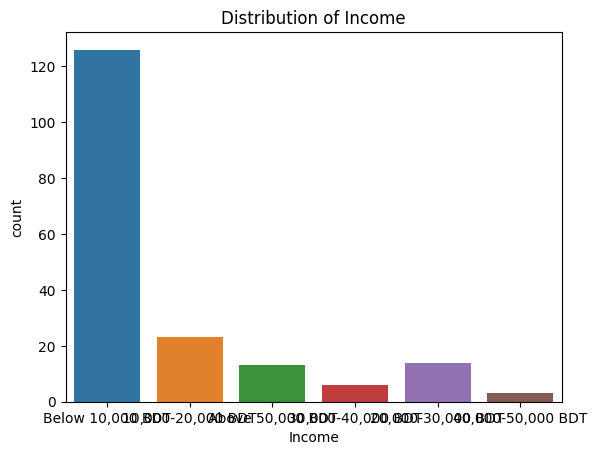

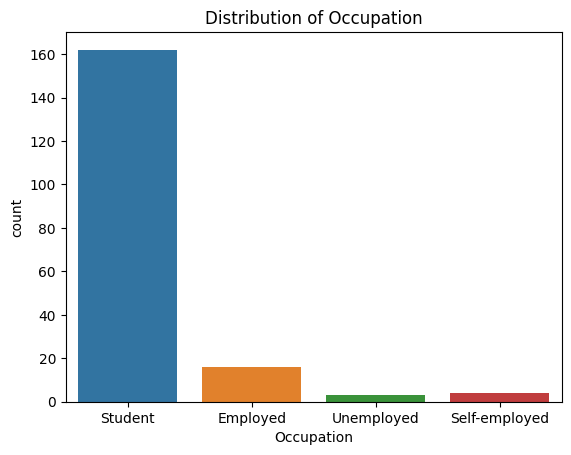

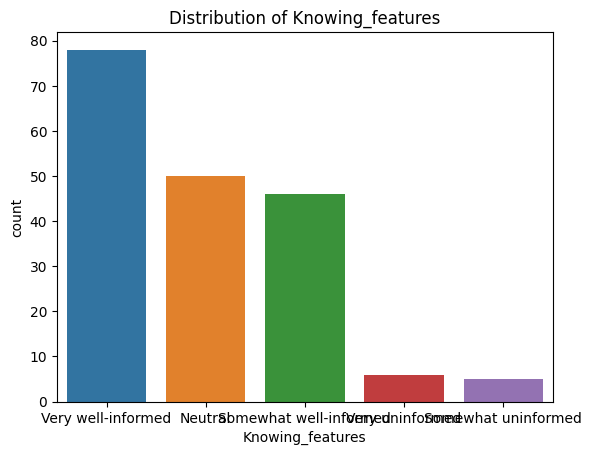

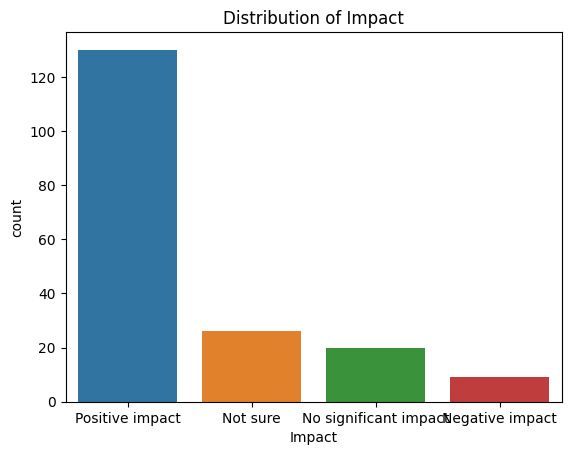

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Age', data=df)
plt.title('Distribution of Age')
plt.show()
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()
sns.countplot(x='Income', data=df)
plt.title('Distribution of Income')
plt.show()
sns.countplot(x='Occupation', data=df)
plt.title('Distribution of Occupation')
plt.show()
sns.countplot(x='Knowing_features', data=df)
plt.title('Distribution of Knowing_features')
plt.show()
sns.countplot(x='Impact', data=df)
plt.title('Distribution of Impact')
plt.show()

In [44]:
#Shopping_freq Models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

le = LabelEncoder()
df['Shopping_freq_encoded'] = le.fit_transform(df['Shopping_freq'])
features = ['Age', 'Gender', 'Occupation', 'Income', 'Motivation', 'Knowing_features', 'Impact']
df_encoded = pd.get_dummies(df[features])
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df['Shopping_freq_encoded'], test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Random Forest Model Accuracy: {accuracy_rf:.4f}')

new_data = pd.DataFrame({
    'Age': ['21-25'],
    'Gender': ['Male'],
    'Occupation': ['Students'],
    'Income': ['Below 10,000 BDT'],
    'Motivation': ['Convenience'],
    'Knowing_features': ['Very well-informed'],
    'Impact': ['Positive impact']
})
new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=df_encoded.columns, fill_value=0)
predictions_rf = model.predict(new_data_encoded)
predicted_labels_rf = le.inverse_transform(predictions_rf)
print("Predicted Shopping Frequency (Random Forest):", predicted_labels_rf)

# Train Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_decision_tree)
print(f'Decision Tree Model Accuracy: {accuracy_dt:.4f}')

# Predict using Decision Tree model on new data
new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=df_encoded.columns, fill_value=0)
predictions_dt = decision_tree_model.predict(new_data_encoded)
predicted_labels_dt = le.inverse_transform(predictions_dt)
print("Predicted Shopping Frequency (Decision Tree):", predicted_labels_dt)

# Train Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set using Logistic Regression model
y_pred_logistic_regression = logistic_regression_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_logistic_regression)
print(f'Logistic Regression Model Accuracy: {accuracy_lr:.4f}')

# Predict using Logistic Regression model on new data
new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=df_encoded.columns, fill_value=0)
predictions_lr = logistic_regression_model.predict(new_data_encoded)
predicted_labels_lr = le.inverse_transform(predictions_lr)
print("Predicted Shopping Frequency (Logistic Regression):", predicted_labels_lr)

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set using SVM model
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Model Accuracy: {accuracy_svm:.4f}')

# Predict using SVM model on new data
new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=df_encoded.columns, fill_value=0)
predictions_svm = svm_model.predict(new_data_encoded)
predicted_labels_svm = le.inverse_transform(predictions_svm)
print("Predicted Shopping Frequency (SVM):", predicted_labels_svm)


Random Forest Model Accuracy: 0.7568
Predicted Shopping Frequency (Random Forest): ['Cash']
Decision Tree Model Accuracy: 0.6757
Predicted Shopping Frequency (Decision Tree): ['Cash']
Logistic Regression Model Accuracy: 0.7027
Predicted Shopping Frequency (Logistic Regression): ['Cash']
SVM Model Accuracy: 0.7297
Predicted Shopping Frequency (SVM): ['Cash']


Confusion Matrix for Random Forest:
[[26  1  1]
 [ 5  1  0]
 [ 2  0  1]]

Confusion Matrix for Decision Tree:
[[23  2  3]
 [ 4  1  1]
 [ 2  0  1]]

Confusion Matrix for Logistic Regression:
[[25  2  1]
 [ 3  1  2]
 [ 3  0  0]]

Confusion Matrix for SVM:
[[26  2  0]
 [ 5  1  0]
 [ 3  0  0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


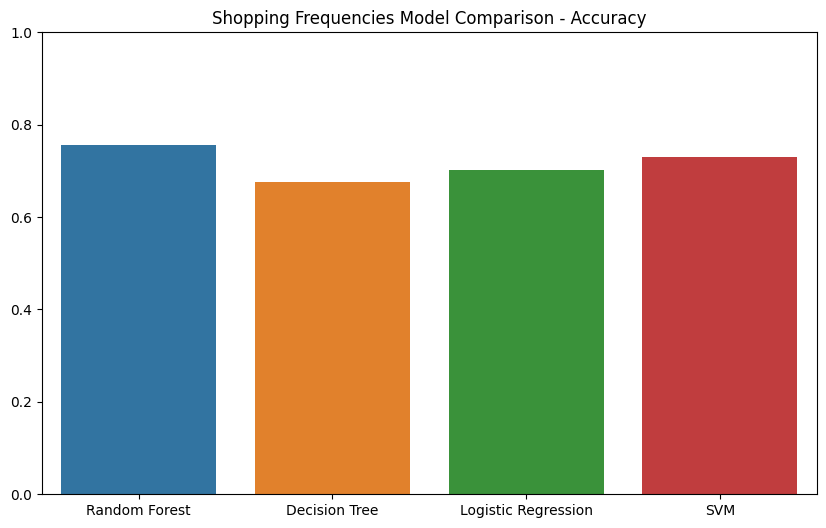

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        28
           1       0.50      0.17      0.25         6
           2       0.50      0.33      0.40         3

    accuracy                           0.76        37
   macro avg       0.60      0.48      0.50        37
weighted avg       0.72      0.76      0.72        37


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.33      0.17      0.22         6
           2       0.20      0.33      0.25         3

    accuracy                           0.68        37
   macro avg       0.44      0.44      0.43        37
weighted avg       0.67      0.68      0.67        37


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        2

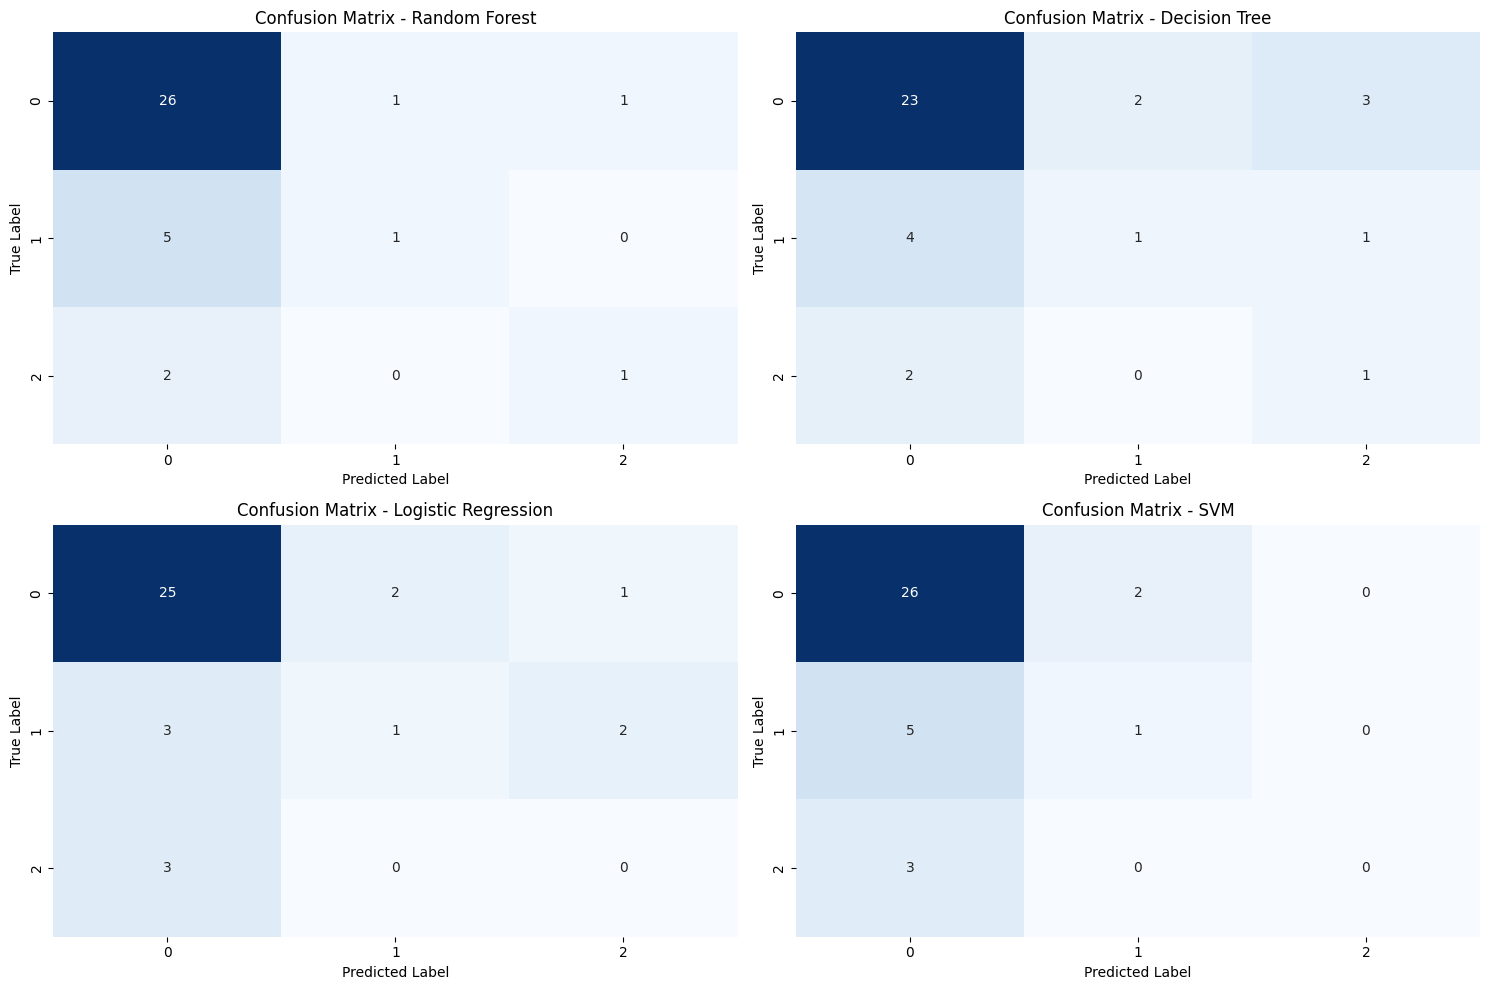

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

model_names = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'SVM']
models = [model, decision_tree_model, logistic_regression_model, svm_model]
accuracies = []
classification_reports = []
confusion_matrices = []

# Evaluate each model
for model, name in zip(models, model_names):
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Create a classification report
    class_report = classification_report(y_test, y_pred)
    classification_reports.append(class_report)

    # Create and store confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    # Display confusion matrix
    print(f'Confusion Matrix for {name}:')
    print(cm)
    print()

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Shopping Frequencies Model Comparison - Accuracy')
plt.ylim(0, 1)
plt.show()
for name, report in zip(model_names, classification_reports):
    print(f'Classification Report for {name}:\n{report}\n')
plt.figure(figsize=(15, 10))
for i, (name, cm) in enumerate(zip(model_names, confusion_matrices), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()


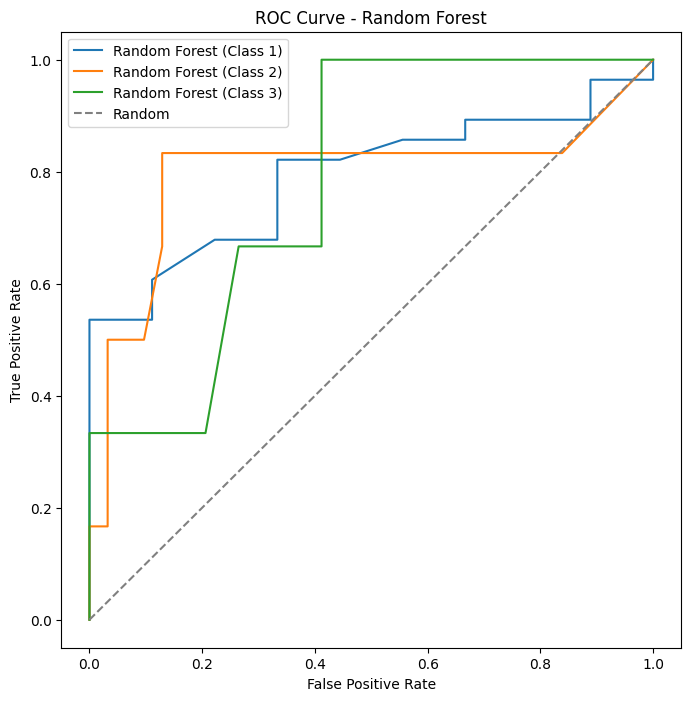

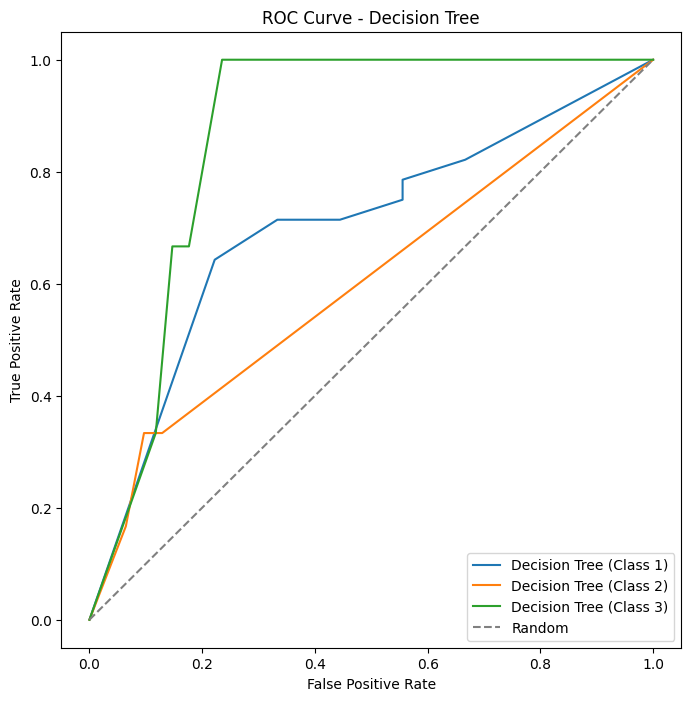

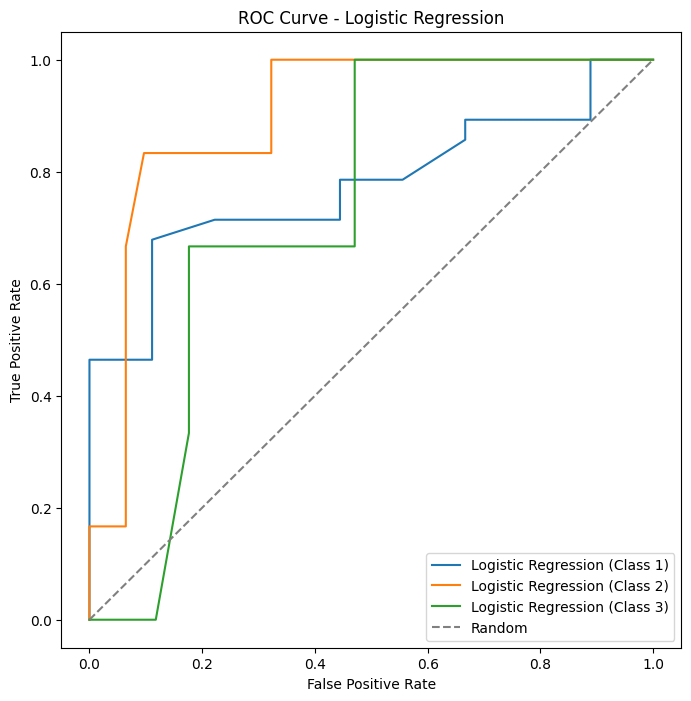

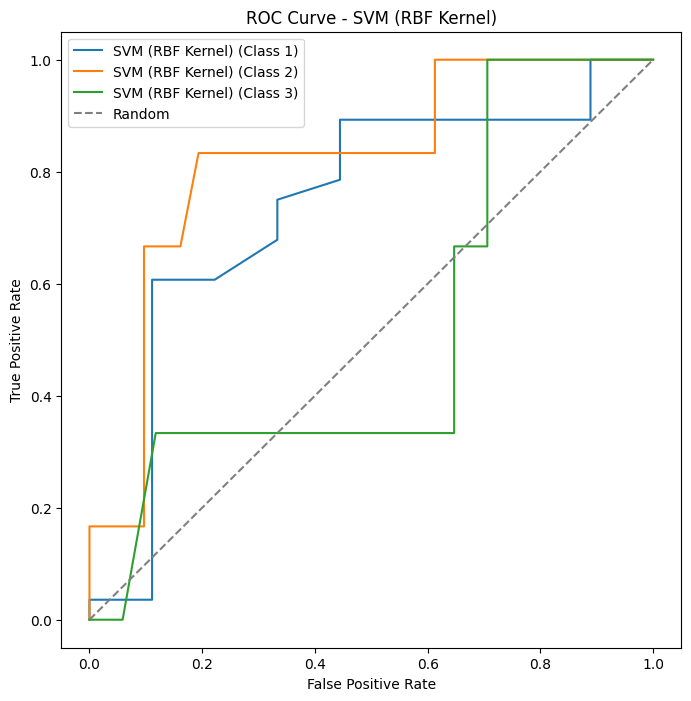

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve
svm_model_rbf = SVC(kernel='rbf', probability=True, random_state=42)
svm_model_rbf.fit(X_train, y_train)
models.append(svm_model_rbf)
model_names.append('SVM (RBF Kernel)')
auc_scores = []
for model, name in zip(models, model_names):
    # Check if the model supports probability estimates
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        auc_score = roc_auc_score(y_test, y_probs, multi_class='ovr')
        auc_scores.append(auc_score)
        plt.figure(figsize=(8, 8))
        for i in range(y_probs.shape[1]):
            fpr, tpr, _ = roc_curve(y_test == i, y_probs[:, i])
            plt.plot(fpr, tpr, label=f'{name} (Class {i + 1})')

        plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
        plt.title(f'ROC Curve - {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

In [47]:
# Paybills_freq Models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

le = LabelEncoder()
df['Paybills_freq_encoded'] = le.fit_transform(df['Paybills_freq'])
features = ['Age', 'Gender', 'Occupation', 'Income', 'Motivation', 'Knowing_features', 'Impact']
df_encoded = pd.get_dummies(df[features])
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df['Paybills_freq_encoded'], test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Random Forest Model Accuracy: {accuracy_rf:.4f}')
new_data = pd.DataFrame({
    'Age': ['21-25'],
    'Gender': ['Male'],
    'Occupation': ['Students'],
    'Income': ['Below 10,000 BDT'],
    'Motivation': ['Convenience'],
    'Knowing_features': ['Very well-informed'],
    'Impact': ['Positive impact']
})


new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=df_encoded.columns, fill_value=0)
predictions_rf = model.predict(new_data_encoded)
predicted_labels_rf = le.inverse_transform(predictions_rf)
print("Predicted Paybills Frequency (Random Forest):", predicted_labels_rf)

# Train Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_decision_tree)
print(f'Decision Tree Model Accuracy: {accuracy_dt:.4f}')

# Predict using Decision Tree model on new data
new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=df_encoded.columns, fill_value=0)
predictions_dt = decision_tree_model.predict(new_data_encoded)
predicted_labels_dt = le.inverse_transform(predictions_dt)
print("Predicted Paybills Frequency (Decision Tree):", predicted_labels_dt)

# Train Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set using Logistic Regression model
y_pred_logistic_regression = logistic_regression_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_logistic_regression)
print(f'Logistic Regression Model Accuracy: {accuracy_lr:.4f}')

# Predict using Logistic Regression model on new data
new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=df_encoded.columns, fill_value=0)
predictions_lr = logistic_regression_model.predict(new_data_encoded)
predicted_labels_lr = le.inverse_transform(predictions_lr)
print("Predicted Paybills Frequency (Logistic Regression):", predicted_labels_lr)

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set using SVM model
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Model Accuracy: {accuracy_svm:.4f}')

# Predict using SVM model on new data
new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=df_encoded.columns, fill_value=0)
predictions_svm = svm_model.predict(new_data_encoded)
predicted_labels_svm = le.inverse_transform(predictions_svm)
print("Predicted Paybills Frequency (SVM):", predicted_labels_svm)


Random Forest Model Accuracy: 0.5405
Predicted Paybills Frequency (Random Forest): ['Mobile Wallet']
Decision Tree Model Accuracy: 0.4324
Predicted Paybills Frequency (Decision Tree): ['Mobile Wallet']
Logistic Regression Model Accuracy: 0.5946
Predicted Paybills Frequency (Logistic Regression): ['Mobile Wallet']
SVM Model Accuracy: 0.5676
Predicted Paybills Frequency (SVM): ['Mobile Wallet']


Confusion Matrix for Random Forest:
[[18  0  3]
 [ 2  1  3]
 [ 9  0  1]]

Confusion Matrix for Decision Tree:
[[13  1  7]
 [ 4  1  1]
 [ 8  0  2]]

Confusion Matrix for Logistic Regression:
[[18  1  2]
 [ 3  1  2]
 [ 7  0  3]]

Confusion Matrix for SVM:
[[17  3  1]
 [ 3  1  2]
 [ 7  0  3]]



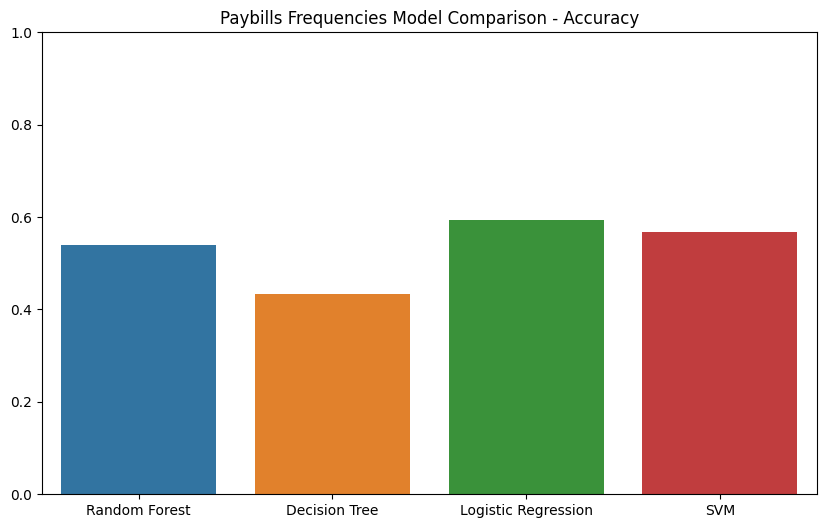

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72        21
           1       1.00      0.17      0.29         6
           2       0.14      0.10      0.12        10

    accuracy                           0.54        37
   macro avg       0.59      0.37      0.37        37
weighted avg       0.55      0.54      0.49        37


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.52      0.62      0.57        21
           1       0.50      0.17      0.25         6
           2       0.20      0.20      0.20        10

    accuracy                           0.43        37
   macro avg       0.41      0.33      0.34        37
weighted avg       0.43      0.43      0.42        37


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.64      0.86      0.73        2

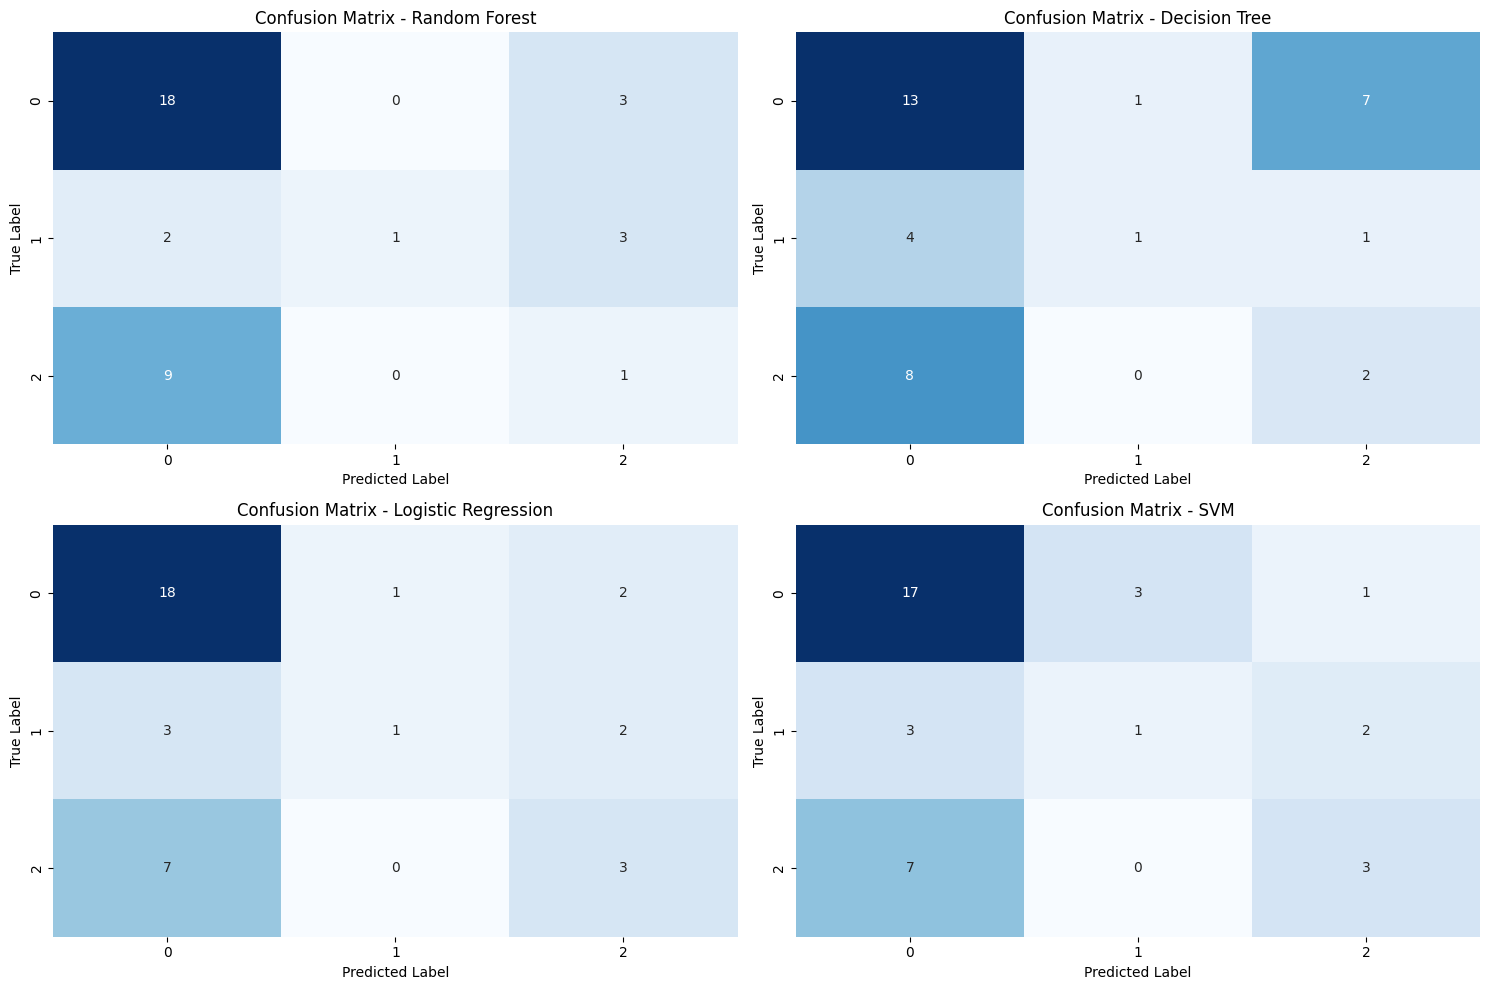

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

model_names = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'SVM']

models = [model, decision_tree_model, logistic_regression_model, svm_model]
accuracies = []
classification_reports = []
confusion_matrices = []

# Evaluate each model
for model, name in zip(models, model_names):
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Create a classification report
    class_report = classification_report(y_test, y_pred)
    classification_reports.append(class_report)

    # Create and store confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    # Display confusion matrix
    print(f'Confusion Matrix for {name}:')
    print(cm)
    print()

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Paybills Frequencies Model Comparison - Accuracy')
plt.ylim(0, 1)
plt.show()
for name, report in zip(model_names, classification_reports):
    print(f'Classification Report for {name}:\n{report}\n')
plt.figure(figsize=(15, 10))
for i, (name, cm) in enumerate(zip(model_names, confusion_matrices), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()


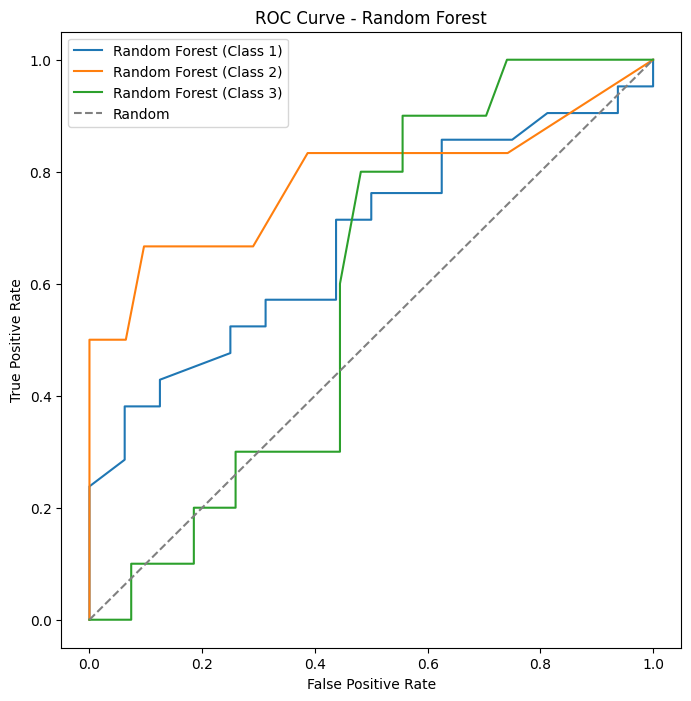

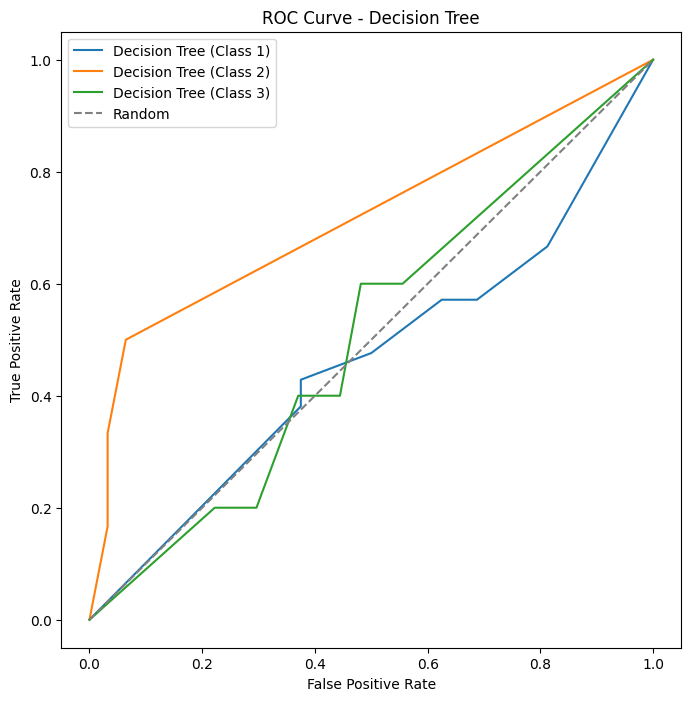

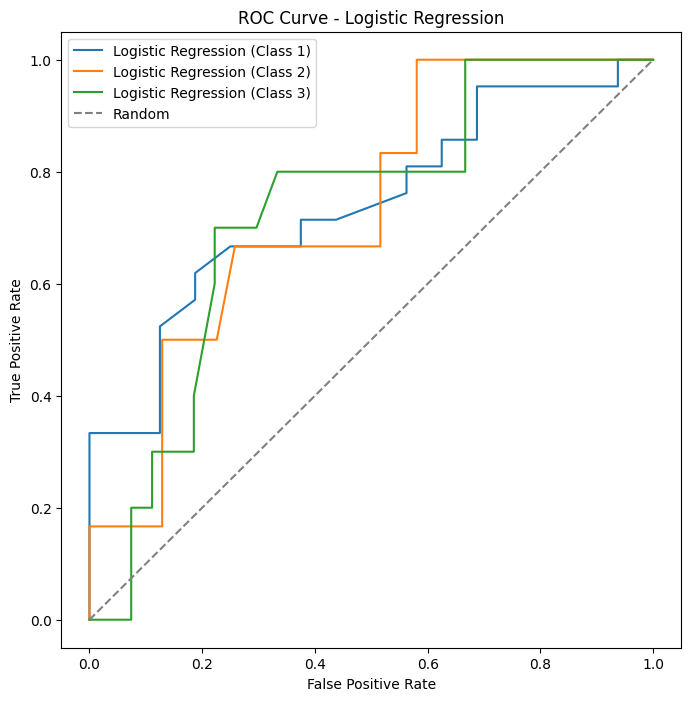

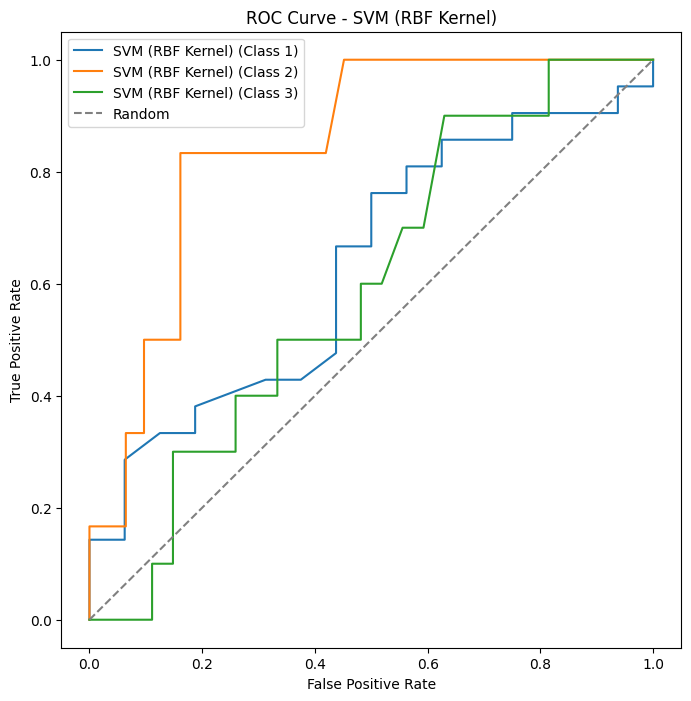

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve
svm_model_rbf = SVC(kernel='rbf', probability=True, random_state=42)
svm_model_rbf.fit(X_train, y_train)
models.append(svm_model_rbf)
model_names.append('SVM (RBF Kernel)')
auc_scores = []
for model, name in zip(models, model_names):
    # Check if the model supports probability estimates
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        auc_score = roc_auc_score(y_test, y_probs, multi_class='ovr')
        auc_scores.append(auc_score)
        plt.figure(figsize=(8, 8))
        for i in range(y_probs.shape[1]):
            fpr, tpr, _ = roc_curve(y_test == i, y_probs[:, i])
            plt.plot(fpr, tpr, label=f'{name} (Class {i + 1})')

        plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
        plt.title(f'ROC Curve - {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

In [50]:
# Payrent_freq Models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

le = LabelEncoder()
df['Payrent_freq_encoded'] = le.fit_transform(df['Payrent_freq'])
features = ['Age', 'Gender', 'Occupation', 'Income', 'Motivation', 'Knowing_features', 'Impact']
df_encoded = pd.get_dummies(df[features])
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df['Payrent_freq_encoded'], test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Random Forest Model Accuracy: {accuracy_rf:.4f}')
new_data = pd.DataFrame({
    'Age': ['21-25'],
    'Gender': ['Male'],
    'Occupation': ['Students'],
    'Income': ['Below 10,000 BDT'],
    'Motivation': ['Convenience'],
    'Knowing_features': ['Very well-informed'],
    'Impact': ['Positive impact']
})
new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=df_encoded.columns, fill_value=0)
predictions_rf = model.predict(new_data_encoded)
predicted_labels_rf = le.inverse_transform(predictions_rf)
print("Predicted Payrent Frequency (Random Forest):", predicted_labels_rf)

# Train Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_decision_tree)
print(f'Decision Tree Model Accuracy: {accuracy_dt:.4f}')

# Predict using Decision Tree model on new data
new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=df_encoded.columns, fill_value=0)
predictions_dt = decision_tree_model.predict(new_data_encoded)
predicted_labels_dt = le.inverse_transform(predictions_dt)
print("Predicted Payrent Frequency (Decision Tree):", predicted_labels_dt)

# Train Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set using Logistic Regression model
y_pred_logistic_regression = logistic_regression_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_logistic_regression)
print(f'Logistic Regression Model Accuracy: {accuracy_lr:.4f}')

# Predict using Logistic Regression model on new data
new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=df_encoded.columns, fill_value=0)
predictions_lr = logistic_regression_model.predict(new_data_encoded)
predicted_labels_lr = le.inverse_transform(predictions_lr)
print("Predicted Payrent Frequency (Logistic Regression):", predicted_labels_lr)

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set using SVM model
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Model Accuracy: {accuracy_svm:.4f}')

# Predict using SVM model on new data
new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=df_encoded.columns, fill_value=0)
predictions_svm = svm_model.predict(new_data_encoded)
predicted_labels_svm = le.inverse_transform(predictions_svm)
print("Predicted Payrent Frequency (SVM):", predicted_labels_svm)


Random Forest Model Accuracy: 0.6757
Predicted Payrent Frequency (Random Forest): ['Cash']
Decision Tree Model Accuracy: 0.6757
Predicted Payrent Frequency (Decision Tree): ['Cash']
Logistic Regression Model Accuracy: 0.7838
Predicted Payrent Frequency (Logistic Regression): ['Cash']
SVM Model Accuracy: 0.7838
Predicted Payrent Frequency (SVM): ['Cash']


Confusion Matrix for Random Forest:
[[25  0  3]
 [ 5  0  0]
 [ 4  0  0]]

Confusion Matrix for Decision Tree:
[[24  0  4]
 [ 4  0  1]
 [ 3  0  1]]

Confusion Matrix for Logistic Regression:
[[28  0  0]
 [ 3  1  1]
 [ 4  0  0]]

Confusion Matrix for SVM:
[[28  0  0]
 [ 4  1  0]
 [ 4  0  0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

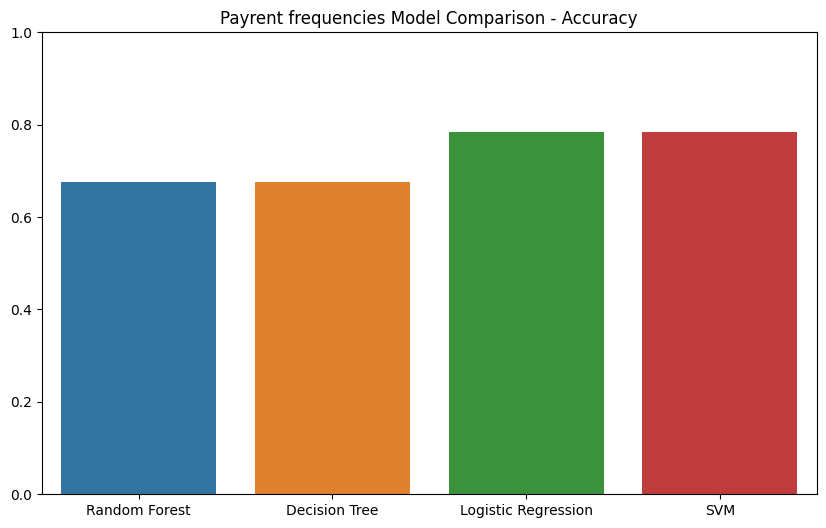

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        28
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         4

    accuracy                           0.68        37
   macro avg       0.25      0.30      0.27        37
weighted avg       0.56      0.68      0.61        37


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        28
           1       0.00      0.00      0.00         5
           2       0.17      0.25      0.20         4

    accuracy                           0.68        37
   macro avg       0.31      0.37      0.34        37
weighted avg       0.60      0.68      0.64        37


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        2

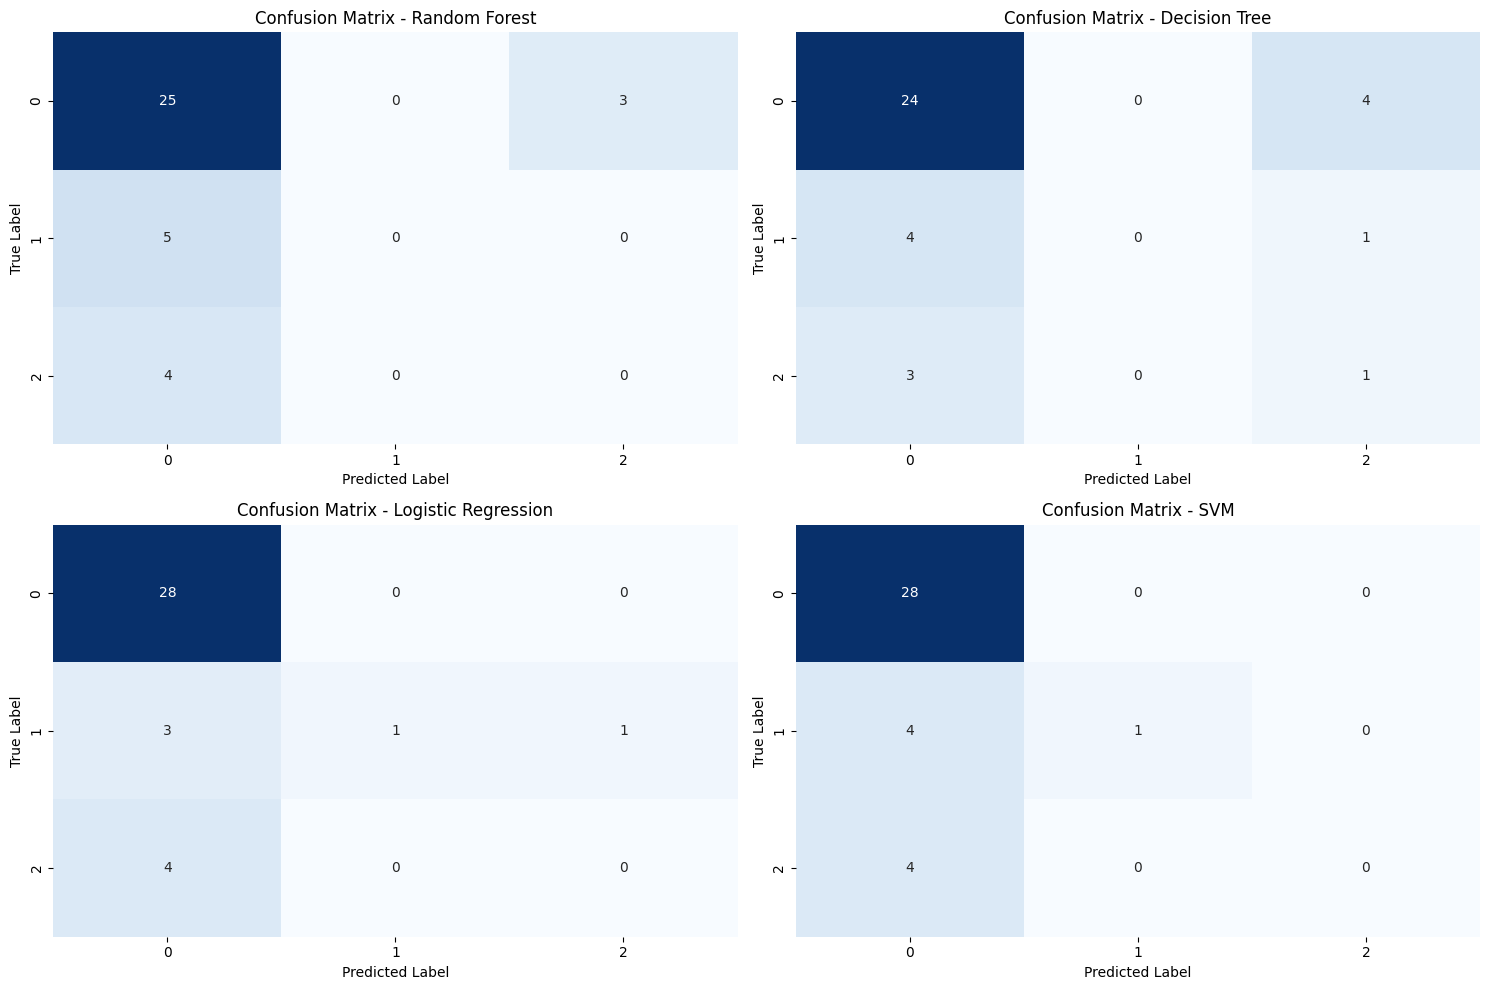

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

model_names = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'SVM']
models = [model, decision_tree_model, logistic_regression_model, svm_model]
accuracies = []
classification_reports = []
confusion_matrices = []

# Evaluate each model
for model, name in zip(models, model_names):
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Create a classification report
    class_report = classification_report(y_test, y_pred)
    classification_reports.append(class_report)

    # Create and store confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    # Display confusion matrix
    print(f'Confusion Matrix for {name}:')
    print(cm)
    print()

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Payrent frequencies Model Comparison - Accuracy')
plt.ylim(0, 1)
plt.show()
for name, report in zip(model_names, classification_reports):
    print(f'Classification Report for {name}:\n{report}\n')
plt.figure(figsize=(15, 10))
for i, (name, cm) in enumerate(zip(model_names, confusion_matrices), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()


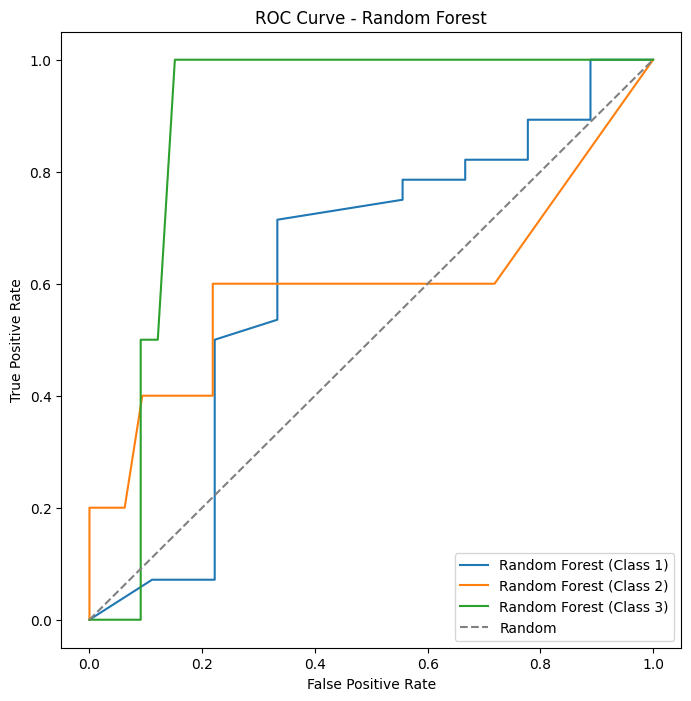

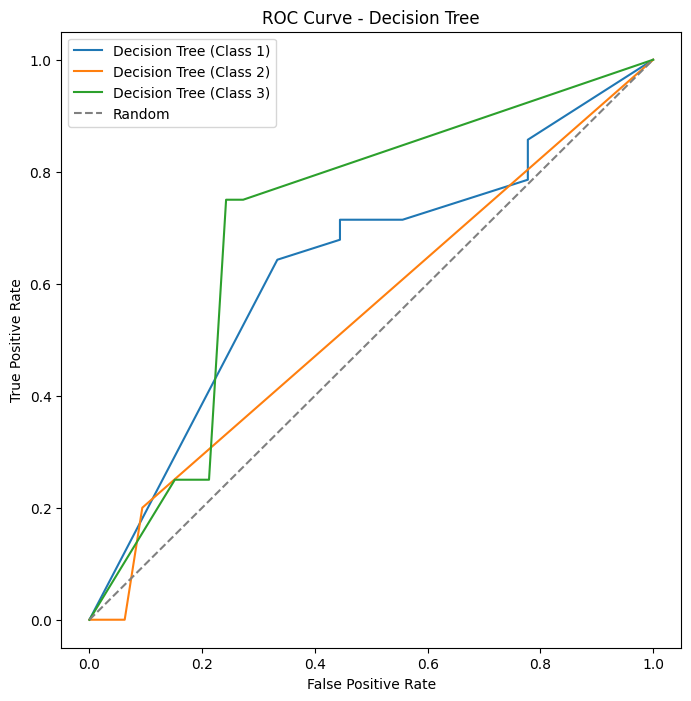

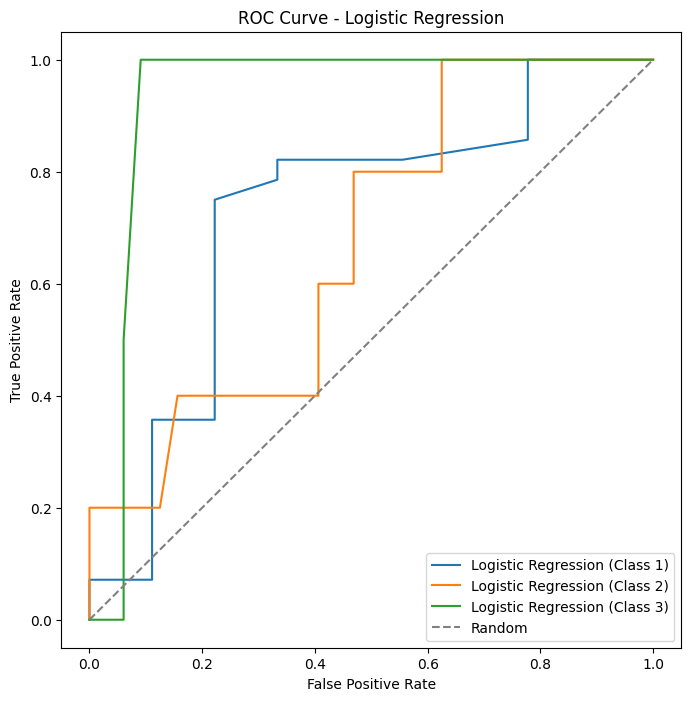

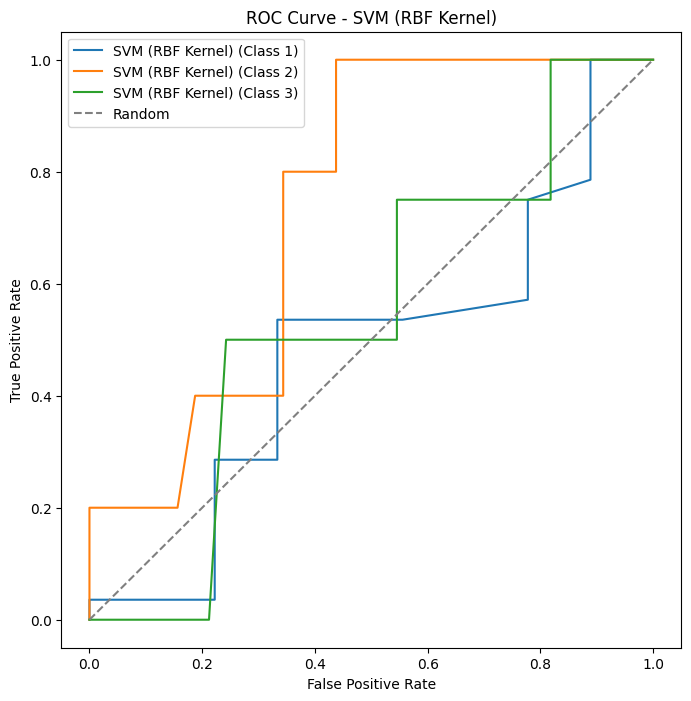

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve
svm_model_rbf = SVC(kernel='rbf', probability=True, random_state=42)
svm_model_rbf.fit(X_train, y_train)
models.append(svm_model_rbf)
model_names.append('SVM (RBF Kernel)')
auc_scores = []
for model, name in zip(models, model_names):
    # Check if the model supports probability estimates
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
        auc_score = roc_auc_score(y_test, y_probs, multi_class='ovr')
        auc_scores.append(auc_score)
        plt.figure(figsize=(8, 8))
        for i in range(y_probs.shape[1]):
            fpr, tpr, _ = roc_curve(y_test == i, y_probs[:, i])
            plt.plot(fpr, tpr, label=f'{name} (Class {i + 1})')

        plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
        plt.title(f'ROC Curve - {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()